In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Implementation

In [94]:
class PolynomialRegression:
        def __init__(self, degree, mixed_features=False, alpha=0.01, minimum_error_decrease=0.000001):
            self.degree = degree
            self.mixed_features = mixed_features
            self.learning_rate = alpha
            self.minimum_error_decrease = minimum_error_decrease
            
            self.weights = None
            self.intercept = None
            self.num_rows = None
            
        # transforms the input data into one that can be used with the polynomial weights, including the constant term
        def get_power_data(self, X):
            X2 = []
            for row in range(len(X)):
                new_row = X[row].copy()
                new_row.insert(0, 1)
                X2.append(new_row)
            X2 = np.asarray(X2)    
            
            
            if self.mixed_features:
                # add products of different features as well as each feature to certain powers
                # ie. max power3: [x, y] --> [1, x, y, x^2, xy, y^2, x^3, x^2 y, xy^2, y^3]
                for i in range(len(X[0]) - 1):
                    for j in range(i + 1, len(X[0])):
                        for degree in range(2, self.degree + 1):
                            for p in range(degree + 1):
                                X2 = np.concatenate((X2, np.multiply(X2[:, [i + 1]] ** (degree - p), X2[:, [j + 1]] ** p)), axis=1)

            else:
                # add only feature ** max power terms
                # ie. max power2: [x, y] --> [1, x, y, x^2, y^2]
                
                for p in range(2, self.degree + 1):
                    for col in range(len(X[0])):
                        X2 = np.concatenate((X2, X2[:, [col + 1]] ** p), axis=1)
                        
                        
            return X2
            
        # cost / error function
        # sum of squared residuals, divided by twice the number of data points
        # note that z should be a column vector
        def cost(self, X, z, data_is_powered=False):
            # todo: extend X to powers
            if not data_is_powered:
                X = self.get_power_data(X)
           
            residuals = np.dot(X, self.weights) - z
            value = 1 / (2 * len(X)) * np.dot(residuals.T, residuals)
            return value[0][0]
        
        def fit(self, X, z):
            # append a column of ones to the X matrix, for the y-intercept term
            X2 = self.get_power_data(X)   
            
            z = [[v] for v in z]
            z = np.asarray(z)   
            
            # initialize weights as 0
            self.weights = np.asarray([[0] for i in range(len(X2[0]))])
            
            m = len(X)            
            costs = []
            
            while True:
                # compute cost function
                curr_cost = self.cost(X2, z, data_is_powered=True)
                costs.append(curr_cost)
                previous = curr_cost
                
                # gradient descent 
                residuals = np.dot(X2, self.weights) - z
                self.weights = self.weights - (self.learning_rate / m) * np.dot(X2.T, residuals)
            
                # compute error of next iteration
                curr_cost = self.cost(X2, z, data_is_powered=True)
                diff = curr_cost - previous

                # if the cost function decreases by less than a certain amount, terminate
                if diff >= -self.minimum_error_decrease:
                    break
                    
        # takes in a non powered dataset and makes the predictions
        def predict(self, X):
            X2 = self.get_power_data(X)
            return np.dot(X2, self.weights)


## Testing

### polynomial of one variable

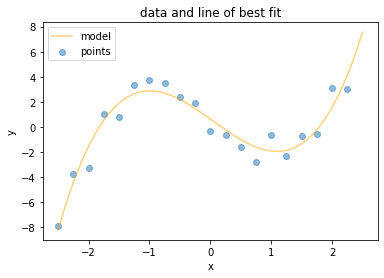

In [76]:
X = []
y = []
for i in np.arange(-2.5, 2.5, 0.25):
    X.append([i])
    y.append(i ** 3 - 3 * i + np.random.normal())

reg = PolynomialRegression(degree=3)
reg.fit(X, y)

x_space = np.linspace(-2.5, 2.5)
plt.scatter(np.asarray(X).flatten(), np.asarray(y).flatten(), label='points', alpha=0.5)

values = [reg.predict([[x]])[0] for x in x_space]
plt.plot(x_space, values, label='model', color='orange', alpha=0.5)
plt.title('data and line of best fit')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

### higher powers

(64, 2)


Text(0.5, 0, 'z')

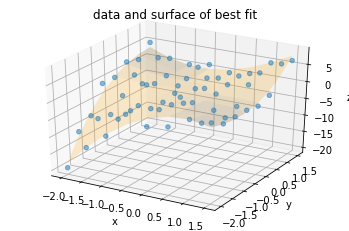

In [106]:
x = []
y = []
z = []
for yval in np.arange(-2, 2, 0.5):
    for xval in np.arange(-2, 2, 0.5):
        x.append(xval)
        y.append(yval)
        z.append(yval * xval ** 2 + xval * yval ** 2 + 2 * np.random.normal())

# scatterplot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='points', alpha=0.5)

# prediction surface
x_space = np.arange(-2, 2, 0.5)
y_space = np.arange(-2, 2, 0.5)
x_space, y_space = np.meshgrid(x_space, y_space)

xy_features = [[x_space[i][j], y_space[i][j]] for i in range(len(x_space)) for j in range(len(y_space))]

reg = PolynomialRegression(degree=3, mixed_features=True)
reg.fit(xy_features, z)

predictions = np.asarray(reg.predict(xy_features)).reshape(x_space.shape)

ax.plot_surface(x_space, y_space, predictions, linewidth=1, color='orange', alpha=0.2, label='surface')
ax.set_title('data and surface of best fit')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# plt.legend()